<center><h1>Convolutions</h1></center>

<center><h2><a href="https://deepcourse-epita.netlify.app/">Course link</a></h2></center>

To keep your modifications in case you want to come back later to this colab, do *File -> Save a copy in Drive*.

If you find a mistake, or know how to improve this notebook, please open an issue [here](https://gitlab.com/ey_datakalab/course_epita).

In this colab, we are going to learn convolutions by practicing different hard coded convolution kernels. In later colabs, we won't handcraft those kernels, but let neural networks find the optimal kernel values.

First, let's download a famous mandril image to visualize results.

In [1]:
!wget https://deepcourse-epita.netlify.app/img/mandril.jpg

--2023-10-27 11:55:11--  https://deepcourse-epita.netlify.app/img/mandril.jpg
Resolving deepcourse-epita.netlify.app (deepcourse-epita.netlify.app)... 52.58.254.253, 3.70.101.28, 2a05:d014:58f:6201::64, ...
Connecting to deepcourse-epita.netlify.app (deepcourse-epita.netlify.app)|52.58.254.253|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 103192 (101K) [image/jpeg]
Saving to: ‘mandril.jpg’

mandril.jpg         100%[===================>] 100,77K  --.-KB/s    in 0,06s   

2023-10-27 11:55:11 (1,75 MB/s) - ‘mandril.jpg’ saved [103192/103192]



In [37]:
from PIL import Image
import torch
from torch import nn
from torch.nn import functional as F
import numpy as np
import matplotlib.pyplot as plt


def torch_to_jpg(tensor):
  # Useful function to pass from tensor image to numpy image to Pillow image
  if len(tensor.shape) == 3:
    tensor = tensor.permute(1, 2, 0) # A jpg image is in the order height / width / channel
  if tensor.shape[-1] == 1:
    tensor = tensor[..., 0] # Remove the last dimension if it is 1
  return Image.fromarray(tensor.numpy().astype(np.uint8))

def jpg_to_torch(jpg_image):
  img = torch.tensor(np.array(jpg_image)).float()
  return img.permute(2, 0, 1)  # In torch the order  is channel / height / width

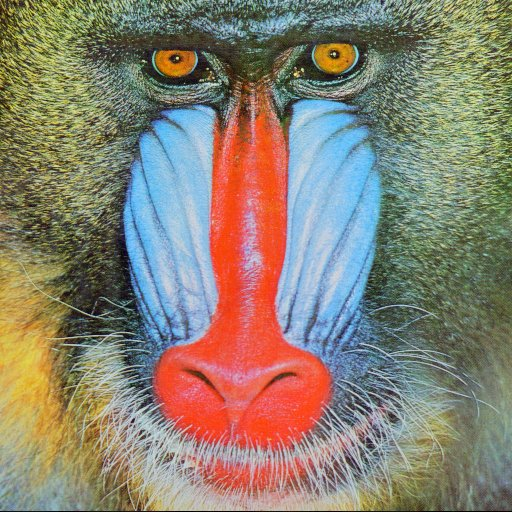

In [38]:
jpg_img = Image.open("mandril.jpg")
img = jpg_to_torch(jpg_img)
jpg_img

Always in deep learning, when working on images, text, audio, internal representation, etc. look at the shape!

In [39]:
img.shape

torch.Size([3, 512, 512])

A gray image can simply be made by averaging the channels, do it:

torch.Size([1, 512, 512])


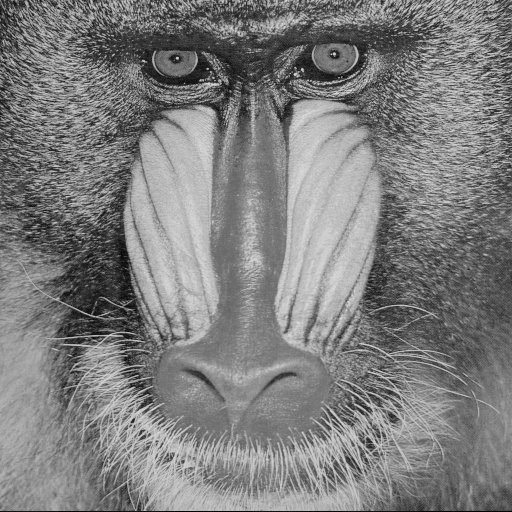

In [40]:
gray_image = torch.mean(img, dim=0, keepdim=True)
print(gray_image.shape)
torch_to_jpg(gray_image)

In [33]:
# Execute this cell to see the solution, but try to do it by yourself before!
# !wget https://deepcourse-epita.netlify.app/code/cnn/gray.py
# %pycat gray.py

Now, let's try a random convolution kernel. We initialize its value using a "kaiming normal" which is the usual initialization in convolutional networks. We'll see later what it is exactly.

Remember in CNN, a "kernel" is actually several convolutions kernels. There is one $k\times k$ kernel per input channel and per output channel, thus we have $C_i \times C_o$ $k \times k$ kernels.

The final size is therefore $C_i \times C_o \times k \times k $.

In the following block, we define a $5 \times 5$ kernel. There are $C_i = 3$ input channels (i.e. RGB) which we will map onto $C_o = 3$ output channels:

In [62]:
w = torch.randn(3, 3, 5, 5)
w = torch.nn.init.kaiming_normal_(w)
w.shape

torch.Size([3, 3, 5, 5])

torch.Size([1, 3, 508, 508])


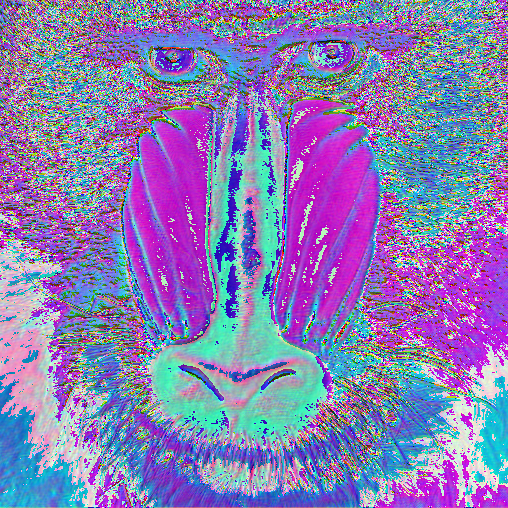

In [63]:
o = F.conv2d(
    # torch wants a "batch" of image, so we add a new dimension to have a batch of size 1 
    img.unsqueeze(0),
    w
)
print(o.shape)
torch_to_jpg(o[0])

Pretty colors right? But not very useful. What about handcrafting a $5 \times 5$ blurring kernel?

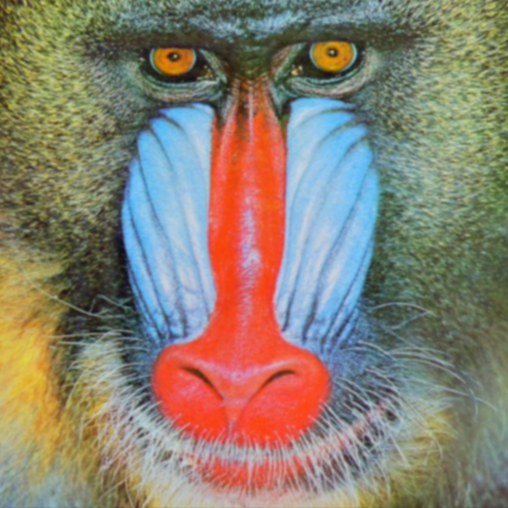

In [67]:
w = torch.zeros(3, 3, 5, 5)
# Gaussian blur (approx)
for i in range(3):
    w[i, i] = 1/256 * torch.tensor([
        [1, 4, 6, 4, 1],
        [4, 16, 24, 16, 4],
        [6, 24, 36, 24, 6],
        [4, 16, 24, 16, 4],
        [1, 4, 6, 4, 1],
    ])

o = F.conv2d(img[None], w)
torch_to_jpg(o[0])

In [55]:
# Execute this cell to see the solution, but try to do it by yourself before!
# !wget https://deepcourse-epita.netlify.app/code/cnn/blur.py
# %pycat blur.py

Visualize the kernel values and interpret it. Remember, we don't want to mix channels! 

In [68]:
w

tensor([[[[0.0039, 0.0156, 0.0234, 0.0156, 0.0039],
          [0.0156, 0.0625, 0.0938, 0.0625, 0.0156],
          [0.0234, 0.0938, 0.1406, 0.0938, 0.0234],
          [0.0156, 0.0625, 0.0938, 0.0625, 0.0156],
          [0.0039, 0.0156, 0.0234, 0.0156, 0.0039]],

         [[0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000]],

         [[0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000]]],


        [[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
    

Now do a **identity kernel**, that will do... nothing:

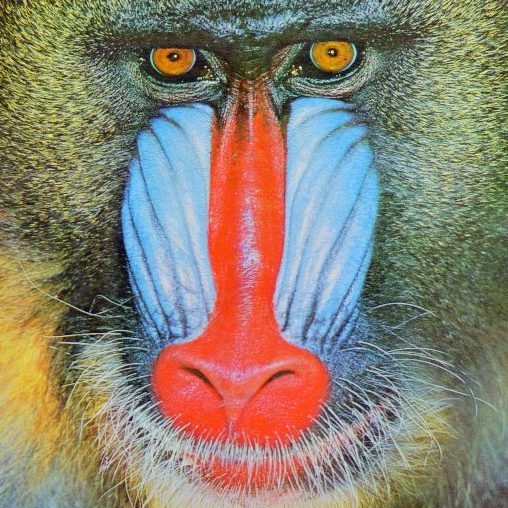

In [69]:
w = torch.zeros(3, 3, 5, 5)
# Identity kernel
for i in range(3):
    w[i, i, 2, 2] = 1

o = F.conv2d(img[None], w)
torch_to_jpg(o[0])

In [59]:
# Execute this cell to see the solution, but try to do it by yourself before!
# !wget https://deepcourse-epita.netlify.app/code/cnn/id.py
# %pycat id.py

Now try a **edge detection** kernel from https://en.wikipedia.org/wiki/Kernel_(image_processing). This kind of kernel was extremely useful before CNN, and can be found in many algorithms such a SIFT.

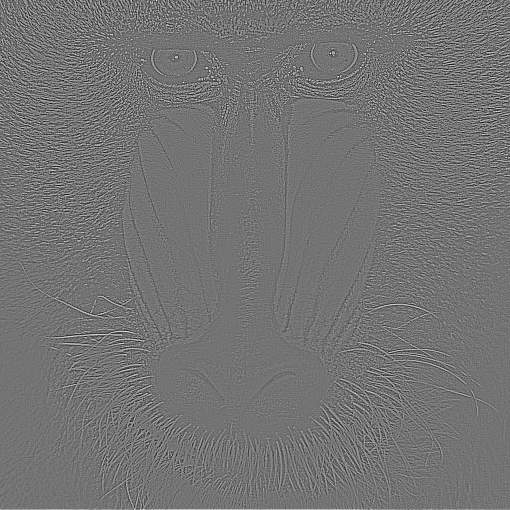

In [79]:
w = torch.zeros(1, 3, 3, 3)
# edge detection
for i in range(3):
    w[0,i] = torch.tensor([
        [-1, -1, -1],
        [-1, 8, -1],
        [-1, -1, -1],
    ])

# Normalize the conv
o = F.conv2d(img[None].mean(dim=0, keepdims=True), w)
o = 255 * (o - o.min()) / (o.max() - o.min())  # Rescale to [0, 255]
torch_to_jpg(o[0])

In [73]:
# Execute this cell to see the solution, but try to do it by yourself before!
# !wget https://deepcourse-epita.netlify.app/code/cnn/edge.py
# %pycat edge.py

Now, let's reproduce an average pooling that will divide the height & width by 2, but with a convolution kernel. First do it with `F.avg_pool2d`, then with a convolution with `F.conv2d`.


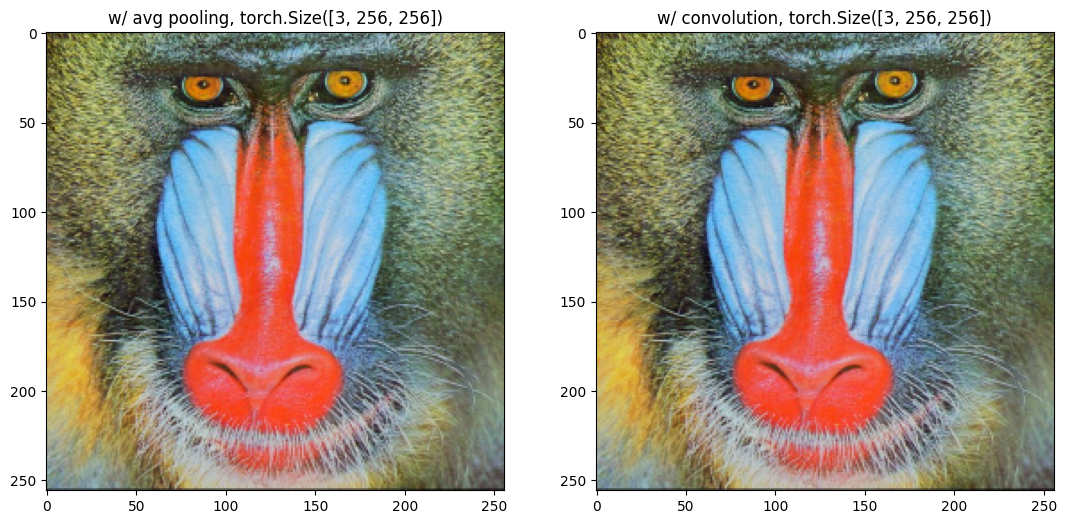

In [88]:
pooled = F.avg_pool2d(img[None], kernel_size=2)
plt.figure(figsize=(13, 8))
plt.subplot(1, 2, 1)
plt.imshow(torch_to_jpg(pooled[0]))
plt.title(f"w/ avg pooling, {pooled[0].shape}")

w = torch.zeros(3, 3, 2, 2)
# Average pooling
for i in range(3):
    w[i, i] = 1/4 * torch.tensor([
        [1, 1],
        [1, 1],
    ])
o = F.conv2d(img[None].mean(dim=0, keepdims=True), w, stride=2)
o = 255 * (o - o.min()) / (o.max() - o.min())  # Rescale to [0, 255]

plt.subplot(1, 2, 2)
plt.imshow(torch_to_jpg(o[0]))
plt.title(f"w/ convolution, {o[0].shape}");

In [89]:
# Execute this cell to see the solution, but try to do it by yourself before!
# !wget https://deepcourse-epita.netlify.app/code/cnn/avg.py
# %pycat avg.py